# Homework 2

## Pair Programming Group Number: Group 55
## Members of Team: Haley Roe

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

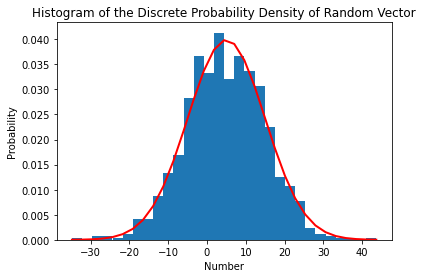

In [2]:
mu, sigma = 5, 10
vector = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(vector, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

plt.title('Histogram of the Discrete Probability Density of Random Vector')
plt.xlabel('Number')
plt.ylabel('Probability')
plt.show()

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph. 
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  If can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

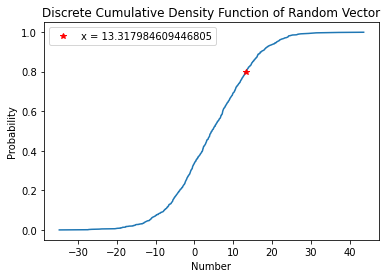

In [3]:
vector.sort()
y = np.arange(0, 1000) / 1000
plt.plot(vector, y)

x = np.percentile(vector, 80)
strng = 'x = ' + str(x)
plt.plot(x, 0.8, 'r*', label=strng)
plt.legend()

plt.title('Discrete Cumulative Density Function of Random Vector')
plt.xlabel('Number')
plt.ylabel('Probability')
plt.show()

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

<AxesSubplot:title={'center':'Boxplot of Melbourne Housing Prices Grouped by Suburb'}, xlabel='Suburb'>

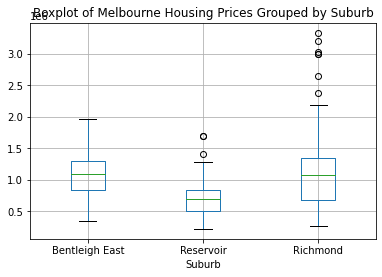

In [4]:
df = pd.read_csv('melb_data.csv')
dfbox = df[ (df['Suburb'] == 'Reservoir') | (df['Suburb'] == 'Richmond') | (df['Suburb'] == 'Bentleigh East') ]
box = dfbox.boxplot(column='Price', by='Suburb')
plt.title('Boxplot of Melbourne Housing Prices Grouped by Suburb')
plt.suptitle('')
box

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

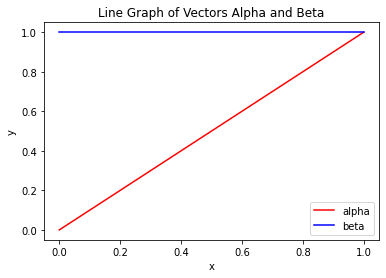

In [5]:
plt.plot( [0, 1], [0, 1], 'r', label='alpha') # alpha
plt.plot( [1, 0], [1, 1], 'b', label='beta') # beta

plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Graph of Vectors Alpha and Beta')
plt.legend()

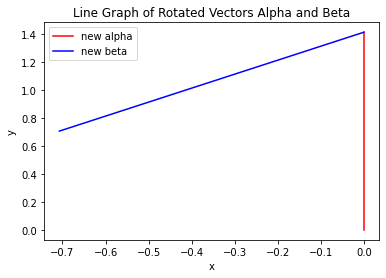

In [6]:
a_start = [[0], [0]]
a_end = [[1], [1]]
b_start = [[1], [1]]
b_end = [[0], [1]]

radian = np.radians(45)
cos, sin = np.cos(radian), np.sin(radian)
rotate = np.array([ [cos, -sin], [sin, cos] ])

a_start = np.matmul(rotate, a_start)
a_end = np.matmul(rotate, a_end)
b_start = np.matmul(rotate, b_start)
b_end = np.matmul(rotate, b_end)

ax = [a_start[0], a_end[0]]
ay = [a_start[1], a_end[1]]
bx = [b_start[0], b_end[0]]
by = [b_start[1], b_end[1]]

plt.plot(ax, ay, 'r', label='new alpha') # alpha
plt.plot(bx, by, 'b', label='new beta') # beta

plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Graph of Rotated Vectors Alpha and Beta')
plt.legend()
plt.show()

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [7]:
A = [ [2, 1, 1], [4, -6, 0], [-2, 7, 2] ]
b = [5, -2, 9]
invertA = np.linalg.inv(A)
solve = np.matmul(invertA, b)
print('x = ', solve[0], '; y = ', solve[1], '; z = ', solve[2])

x =  1.0 ; y =  1.0 ; z =  2.0
